In [7]:
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
import skimage
from matplotlib import pyplot as plt

In [57]:
# Preprocessing functions
# Grayscale
def get_grayscale(image):
    output = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return output
 
# Median filter
def apply_median_filter(image):
    output = cv2.medianBlur(image, 15)
    return output

# Resize
def resize_image(image, scale_factor):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Dilation
def apply_dilation(image):
    kernel = np.ones((7,7),np.uint8)
    output = cv2.dilate(image, kernel, iterations = 1)
    return output

# Convolution

# Convert to 0 -> 1 scale
def rescale_intensity(image):
    output = skimage.exposure.rescale_intensity(image, (0, 255), (0, 1))
    return output

# Thresholding
def thresholding(image):
    output = image.astype(np.uint8)
    # output = cv2.GaussianBlur(image, (3, 3), 0)
    output = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    # output = cv2.adaptiveThreshold(output, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
    return output

# Substration

# Fill
def fill_holes(image):
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.max()
    mask = image
    output = skimage.morphology.reconstruction(seed, mask, method='erosion')
    return output

# Morphology and Erosion
def apply_morphological(thresholed_image):
    kernel = np.ones((3,3), np.uint8)
    # invert = cv2.bitwise_not(thresholed_image)
    output = cv2.morphologyEx(thresholed_image, cv2.MORPH_BLACKHAT, kernel)
    return output

# Erosion
def erode(image):
    kernel = np.ones((7,7),np.uint8)
    output = cv2.erode(image, kernel, iterations = 1)
    return output


#skew correction - not used
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    output = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return output

#border removal
def remove_border(image):
    mask = np.zeros(image.shape, dtype=np.uint8)

    cnts = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    cv2.fillPoly(mask, cnts, [255,255,255])
    mask = 255 - mask
    result = cv2.bitwise_or(image, mask)
    return result    

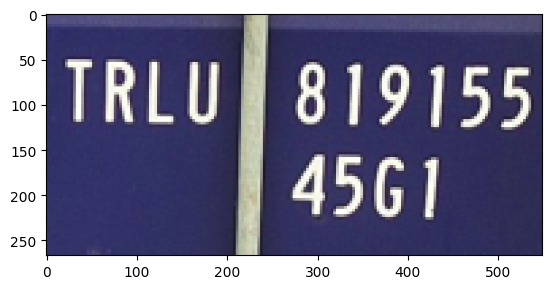

Text(0.5, 1.0, 'erode')

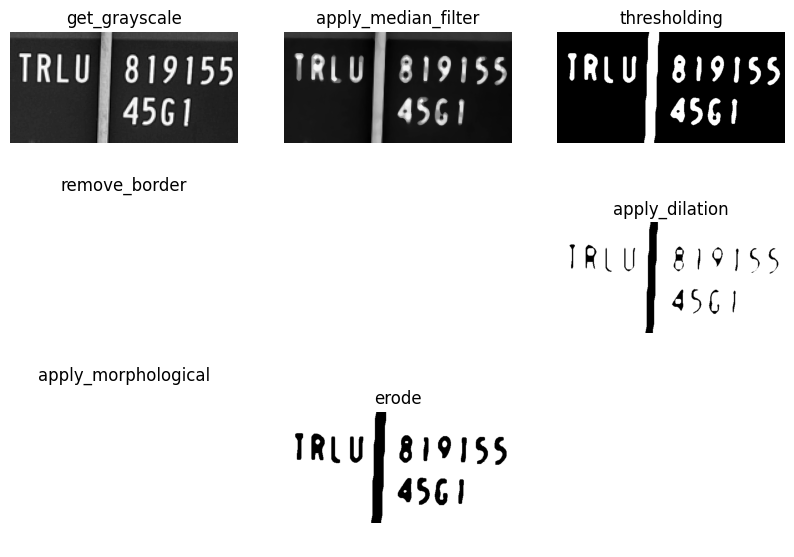

In [69]:
# Inputting image as BGR
# image = cv2.imread(r"E:\Internship\Common_resources\Screenshots\Screenshot 2023-12-20 104805.png")
image = cv2.imread(r"E:\Internship\Common_resources\Screenshots\Screenshot 2023-12-20 105834.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = resize_image(image, 3)
plt.imshow(image)
plt.show()
# Preprocessing

rows = 3
columns = 3

fig = plt.figure(figsize=(10, 7)) 

# Adds subplot
fig.add_subplot(rows, columns, 1) 

processed_img = get_grayscale(image)
plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("get_grayscale") 

# Adds subplot
fig.add_subplot(rows, columns, 2) 

processed_img = apply_median_filter(processed_img)
plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("apply_median_filter") 

# Adds subplot
fig.add_subplot(rows, columns, 3) 

processed_img = thresholding(processed_img)
plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("thresholding") 

# Adds subplot
fig.add_subplot(rows, columns, 4) 

# processed_img = remove_border(processed_img)
# plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("remove_border") 

processed_img = cv2.bitwise_not(processed_img)
# # Adds subplot
# fig.add_subplot(rows, columns, 5) 

# processed_img = deskew(processed_img)
# plt.imshow(processed_img, cmap='gray') 
# plt.axis('off') 
# plt.title("deskew") 

# Adds subplot
fig.add_subplot(rows, columns, 6) 

processed_img = apply_dilation(processed_img)
plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("apply_dilation")

# Adds subplot
fig.add_subplot(rows, columns, 7) 

# processed_img = apply_morphological(processed_img)
# plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("apply_morphological") 

# Adds subplot
fig.add_subplot(rows, columns, 8) 

processed_img = erode(processed_img)
plt.imshow(processed_img, cmap='gray') 
plt.axis('off') 
plt.title("erode") 



In [70]:
# Custom script for pytesseract
custom_config = r'--oem 3 --psm 12'
pytesseract.pytesseract.tesseract_cmd = r'D:/Programs/Tesseract-OCR/tesseract.exe'

# Extract data to array
d = pytesseract.image_to_data(processed_img, config=custom_config, output_type=Output.DICT)
print(d)

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'left': [0, 278, 278, 278, 278, 27, 27, 27, 27, 274, 274, 274, 274], 'top': [0, 56, 56, 56, 56, 0, 0, 0, 0, 158, 158, 158, 158], 'width': [549, 258, 258, 258, 258, 219, 219, 219, 219, 159, 159, 159, 159], 'height': [267, 71, 71, 71, 71, 267, 267, 267, 267, 66, 66, 66, 66], 'conf': [-1, -1, -1, -1, 95, -1, -1, -1, 34, -1, -1, -1, 89], 'text': ['', '', '', '', '819155', '', '', '', 'ny', '', '', '', '4561']}


In [71]:
# # Display bounding boxes
# n_boxes = len(d['level'])
# for i in range(n_boxes):
#     (l,t,w,h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     # Draw bounding boxes on words only (conf > -1)
#     if int(d['conf'][i]) > -1:
#         cv2.rectangle(rgbImage, (l,t), (l+w, t+h), (0, 255, 0), 2)

# cv2.imshow('img', rgbImage)
# cv2.waitKey(0)